In [3]:
import torch
# Create *known* parameters
weight = [0.3,0.4]
bias = 0.9

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight[0] * X + weight[1]*X**2+ bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9062],
         [0.9094],
         [0.9126],
         [0.9160],
         [0.9194],
         [0.9230],
         [0.9266],
         [0.9302]]))

In [4]:
X_train,Y_train = X[:80], y[:80]
X_test,Y_test = X[80:101], y[80:101]

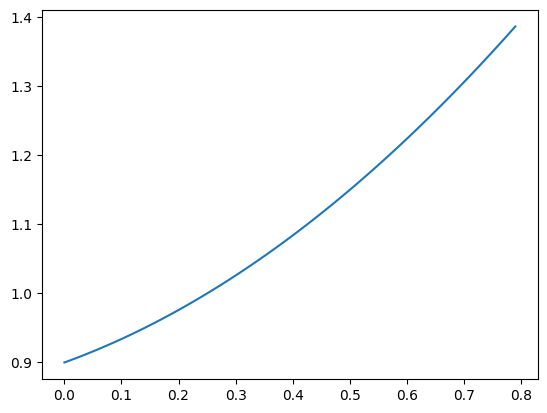

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_train,Y_train)

In [22]:
from torch import nn

# Option 1 - subclass torch.nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Use nn.Linear() for creating the model parameters
        self.weight = nn.Parameter(torch.randn(2, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        

  
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight[0] * x + self.weight[1] * x**2 + self.bias

# Step 2: Create an instance of the model
model = LinearRegressionModel()

# Step 3: Inspect model parameters
print("Model parameters (state_dict):")
print(model.state_dict())

# Optional: check parameter values directly
print("\nWeight[0]:", model.weight[0].item())
print("\nWeight[1]:", model.weight[1].item())
print("Bias:", model.bias.item())

Model parameters (state_dict):
OrderedDict({'weight': tensor([-0.0526,  0.6970]), 'bias': tensor([-0.0802])})

Weight[0]: -0.05255282297730446

Weight[1]: 0.6969926953315735
Bias: -0.08017312735319138


In [23]:
# Step 3
criterion = nn.L1Loss()  # L1 loss (|y_pred - y_true|)

# Step 4: Define the optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 5: Inspect
print("Model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

print("\nLoss function:", criterion)
print("Optimizer:", optimizer)

Model parameters:
weight: tensor([-0.0526,  0.6970])
bias: tensor([-0.0802])

Loss function: L1Loss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [29]:
epochs = 800
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(epochs):
    
    y_pred = model(X_train)
    loss_ = criterion(Y_train,y_pred)
    
    optimizer.zero_grad()
    
    loss_.backward() 
    optimizer.step() 
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        w1, w2, b = model.weight[0].item(),model.weight[1].item(), model.bias.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss_.item():.4f}, w1={w1:.3f},w2={w2:.3f}, b={b:.3f}")

Epoch [20/800], Loss: 0.0059, w1=0.179,w2=0.544, b=0.920
Epoch [40/800], Loss: 0.0057, w1=0.183,w2=0.540, b=0.919
Epoch [60/800], Loss: 0.0055, w1=0.187,w2=0.535, b=0.918
Epoch [80/800], Loss: 0.0053, w1=0.191,w2=0.530, b=0.918
Epoch [100/800], Loss: 0.0051, w1=0.195,w2=0.526, b=0.917
Epoch [120/800], Loss: 0.0049, w1=0.199,w2=0.521, b=0.916
Epoch [140/800], Loss: 0.0047, w1=0.203,w2=0.516, b=0.916
Epoch [160/800], Loss: 0.0045, w1=0.207,w2=0.511, b=0.915
Epoch [180/800], Loss: 0.0043, w1=0.211,w2=0.507, b=0.914
Epoch [200/800], Loss: 0.0041, w1=0.215,w2=0.502, b=0.914
Epoch [220/800], Loss: 0.0040, w1=0.219,w2=0.497, b=0.913
Epoch [240/800], Loss: 0.0038, w1=0.223,w2=0.493, b=0.912
Epoch [260/800], Loss: 0.0036, w1=0.227,w2=0.488, b=0.912
Epoch [280/800], Loss: 0.0034, w1=0.231,w2=0.483, b=0.911
Epoch [300/800], Loss: 0.0032, w1=0.235,w2=0.478, b=0.911
Epoch [320/800], Loss: 0.0030, w1=0.239,w2=0.474, b=0.910
Epoch [340/800], Loss: 0.0029, w1=0.243,w2=0.469, b=0.910
Epoch [360/800], L

In [26]:
model

LinearRegressionModel()